In [3]:
import numpy as np
import sys
import os
import textwrap
from datetime import datetime as dt
import calendar
import texts as tx

In [6]:
import sys,time

string = """ H opefully
 A ll
 R espectful
 V isitors
 E njoy
 S ome
 T ipping"""

typing_speed = 390

def slow_type(t):
    for l in t:
        sys.stdout.write(l)
        sys.stdout.flush()
        time.sleep(10.0/typing_speed)
    print('\n')

slow_type(string)

 H opefully
 A ll
 R espectful
 V isitors
 E njoy
 S ome
 T ipping



In [11]:
def sorterkey(line):
    year = line[6:10]
    month = line[11:13]
    day = line[14:16]
    time = line[21:26].replace('-', '')
    
    return (int(year), int(month), int(day), int(time))

path = './txt/'

flag = True
files = []
i = 0
for dirpath, dirnames, filenames in os.walk(path):
    for f in filenames:
        if 'ipynb_checkpoints' not in dirpath:
            if 'LOG' not in f:
                print(f)
                files.append(os.path.join(dirpath, f))
                flag = False

files = sorted(files, key=sorterkey)

date = []
weekday = []
time = []
ratio = []
total = []
bar = []
card = []
holiday = []

for file in files:
    data = np.genfromtxt(file, dtype='str', delimiter='\n')
    s_date, s_time = data[0].split(', ', 1)
    date.append(s_date)

    weekday.append(dt.strptime(s_date, "%d.%m.%Y").weekday())

    if int(s_time[-5:-3]) > 17:
        time.append('PM')
    else:
        time.append('AM')

    for line in data[1:]:
        if 'ratio' in line:
            ratio.append(float(line[12:-3]))

        elif 'sum' in line:
            total.append(float(line[6:]))

        elif 'bar' in line:
            try:
                bar.append(float(line[6:]))
            except ValueError:
                bar.append(line[6:])

        elif 'card' in line:
            try:
                card.append(float(line[7:]))
            except ValueError:
                card.append(line[7:])

        elif 'holiday' in line:
            try:
                holiday.append(float(line[10:]))
            except ValueError:
                holiday.append(line[10:])

bar = list(filter(lambda item: item != 'None', bar))
card = list(filter(lambda item: item != 'None', card))

print(f'total: {np.mean(total):7.3f} +/- {np.std(total):6.3f}')
print(f'ratio: {np.mean(ratio):7.3f} +/- {np.std(ratio):6.3f}')
print(f'bar:   {np.mean(bar):7.3f} +/- {np.std(bar):6.3f}')
print(f'card:  {np.mean(card):7.3f} +/- {np.std(card):6.3f}')

print('')
print('')

print('top three: total')
line = ' '*6 + 'total' + ' '*6 + 'ratio' + ' '*8 + 'timestamp'
print(line)
line = '-'*3 + '+' + '-'*9 + '+' + '-'*10 + '+' + '-'*18
print(line)

top = sorted(zip(total, ratio, date, time, holiday), reverse=True)[:3]
for i in range(len(top)):
    wkday = dt.strptime(top[i][2], '%d.%m.%Y').strftime('%a')
    print(f'{i+1}":  {float(top[i][0]):6.2f}€   {float(top[i][1]):5.3f}€/h   {top[i][2]:10} {wkday} {top[i][3]}')
    print(f'{" "*5}holiday -> {top[i][4].capitalize()}')

print('')
print('')

print('top three: ratio')
line = ' '*6 + 'ratio' + ' '*6 + 'total' + ' '*8 + 'timestamp'
print(line)
line = '-'*3 + '+' + '-'*9 + '+' + '-'*10 + '+' + '-'*18
print(line)

top = sorted(zip(ratio, total, date, time, holiday), reverse=True)[:3]
for i in range(len(top)):
    wkday = dt.strptime(top[i][2], '%d.%m.%Y').strftime('%a')
    print(f'{i+1}": {float(top[i][0]):5.2f}€/h   {float(top[i][1]):6.3f}€   {top[i][2]:10} {wkday} {top[i][3]}')
    print(f'{" "*5}holiday -> {top[i][4].capitalize()}')


print('')
print('')

total = np.array(total)
ratio = np.array(ratio)

print('AM')
AM = [i == 'AM' for i in time]
print(f'total: {np.mean(total[AM]):7.3f} +/- {np.std(total[AM]):6.3f}')
print(f'ratio: {np.mean(ratio[AM]):7.3f} +/- {np.std(ratio[AM]):6.3f}')

print('')

print('PM')
PM = [i == 'PM' for i in time]
print(f'total: {np.mean(total[PM]):7.3f} +/- {np.std(total[PM]):6.3f}')
print(f'ratio: {np.mean(ratio[PM]):7.3f} +/- {np.std(ratio[PM]):6.3f}')
    
    

05-Sat-13-49.txt
18-Tue-13-36.txt
14-Fri-18-55.txt
19-Wed-18-35.txt
16-Sat-13-58.txt
30-Fri-18-48.txt
01-Thu-13-48.txt
10-Sat-13-56.txt
21-Sun-18-57.txt
29-Thu-18-50.txt
18-Sat-13-41.txt
12-Sun-14-30.txt
09-Mon-13-35.txt
10-Tue-18-36.txt
14-Sat-18-08.txt
01-Sun-18-32.txt
07-Sat-18-39.txt
02-Mon-13-34.txt
10-Tue-13-32.txt
01-Sun-14-13.txt
07-Sat-13-34.txt
08-Sun-14-29.txt
17-Tue-00-05.txt
29-Sat-13-38.txt
30-Sun-13-56.txt
01-Sat-18-26.txt
22-Sat-13-48.txt
14-Fri-18-19.txt
30-Sun-18-23.txt
09-Sat-18-35.txt
20-Wed-18-14.txt
12-Tue-13-42.txt
15-Fri-13-39.txt
18-Mon-18-26.txt
24-Sun-13-32.txt
09-Sat-13-39.txt
05-Tue-18-17.txt
20-Wed-13-43.txt
05-Tue-13-37.txt
02-Sat-14-16.txt
13-Wed-14-06.txt
29-Fri-13-55.txt
17-Sun-13-36.txt
13-Wed-18-28.txt
25-Mon-13-42.txt
11-Mon-13-34.txt
23-Sat-13-55.txt
11-Mon-13-32.txt
29-Fri-18-33.txt
18-Mon-13-36.txt
06-Wed-13-54.txt
02-Sat-18-51.txt
12-Tue-18-45.txt
23-Sat-18-11.txt
20-Sun-18-29.txt
19-Sat-18-27.txt
19-Sat-14-33.txt
27-Sun-14-03.txt
06-Sun-18-40.t

In [217]:
path = './txt/'

flag = True
files = []
i = 0
for dirpath, dirnames, filenames in os.walk(path):
    for f in filenames:
        if 'ipynb_checkpoints' not in dirpath:
            if 'LOG' not in dirpath:
                files.append(os.path.join(dirpath, f))
                flag = False

files = sorted(files, key=sorterkey)

date = []
weekday = []
time = []
ratio = []
total = []
bar = []
card = []
holiday = []

for file in files:
    data = np.genfromtxt(file, dtype='str', delimiter='\n')
    s_date, s_time = data[0].split(', ', 1)
    date.append(s_date)

    weekday.append(dt.strptime(s_date, "%d.%m.%Y").weekday())

    if int(s_time[-5:-3]) > 17:
        time.append('PM')
    else:
        time.append('AM')

    for line in data[1:]:
        if 'ratio' in line:
            ratio.append(float(line[12:-3]))

        elif 'sum' in line:
            total.append(float(line[6:]))

        elif 'bar' in line:
            try:
                bar.append(float(line[6:]))
            except ValueError:
                bar.append(line[6:])

        elif 'card' in line:
            try:
                card.append(float(line[7:]))
            except ValueError:
                card.append(line[7:])

        elif 'holiday' in line:
            try:
                holiday.append(float(line[10:]))
            except ValueError:
                holiday.append(line[10:])

bar = list(filter(lambda item: item != 'None', bar))
card = list(filter(lambda item: item != 'None', card))

print('frequency')
print('total:', len(weekday),
      ', AM:', (np.array(time) == 'AM').sum(),
      ', PM:', (np.array(time) == 'PM').sum())

def chunker(part, full):
    chunks, remain = divmod(int(part * 8 / full * 100), 8)
    bar = '█' * chunks
    
    if remain > 0:
        bar += chr(ord('█') + (8 - remain))
        
    return bar

for i in range(7):
    day = (np.array(weekday) == i).sum()
    s = chunker(day, len(weekday))
    s += f'{(np.array(weekday) == i).sum():3}, '
    s += f'{(np.array(weekday) == i).sum() / len(weekday)*100:3.1f}%'
    
    print(s)


frequency
total: 60 , AM: 38 , PM: 22
███████████▋  7, 11.7%
██████████  6, 10.0%
███████████████  9, 15.0%
██████▋  4, 6.7%
██████▋  4, 6.7%
█████████████████████████ 15, 25.0%
█████████████████████████ 15, 25.0%


In [193]:
p = 'asdf'
print(p)
p = 3
print(p)

asdf
3


total: 100.815 +/- 31.723
ratio:   4.731 +/-  1.190
bar:    52.242 +/- 17.801
card:   57.490 +/- 17.057


top three: total
      total      ratio        timestamp
---+---------+----------+------------------
1":  184.50€   6.099€/h   13.08.2023 Sun AM
     holiday -> False
2":  155.30€   6.090€/h   02.09.2023 Sat AM
     holiday -> False
3":  151.28€   5.991€/h   27.08.2023 Sun PM
     holiday -> False


top three: ratio
      ratio      total        timestamp
---+---------+----------+------------------
1":  8.27€/h   140.530€   25.09.2023 Mon AM
     holiday -> False
2":  7.00€/h   112.010€   13.09.2023 Wed PM
     holiday -> False
3":  6.58€/h   124.920€   12.09.2023 Tue AM
     holiday -> False


AM
total: 107.178 +/- 29.579
ratio:   4.928 +/-  1.146

PM
total:  89.825 +/- 32.291
ratio:   4.390 +/-  1.188


holidays with weekends (Fri - Sun)
total: 105.424 +/- 33.763
ratio:   4.507 +/-  1.085

normal days
total:  92.256 +/- 25.408
ratio:   5.146 +/-  1.263


Monday
total:  94.604 +/-

render plot?  


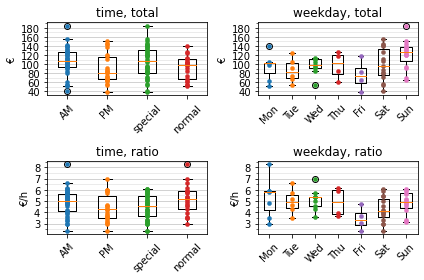

render plots done.


In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import statistic
statistic.statistic()

In [40]:
import os
import numpy as np
from datetime import datetime as dt
import ferienfeiertage as ff

offline = []

root_dir = './txt/'
for root, dirs, files in os.walk(root_dir, onerror=None):
    for filename in files:
        file_path = os.path.join(root, filename)
        try:
            with open(file_path, "rb") as f:
                for line in f:
                    try:
                        line = line.decode("utf-8")
                    except ValueError:
                        continue
                    if 'offline' in line:
                        offline.append(file_path)
                        break
        except (IOError, OSError):
            pass
        
for file in offline:
    newdata = np.genfromtxt(file, dtype='str', delimiter='\n')

    date = newdata[0][:10]
    newdata[-1] = 'holiday = ' + ff.check(dt.strptime(date, "%d.%m.%Y"), name=1)
    
    with open(file, "w+") as f:
        f.writelines(newdata)

In [43]:
import os

keyword = input("Search For?: ")  # ask the user for keyword, use raw_input() on Python 2.x

root_dir = './txt/'  # path to the root directory to search
for root, dirs, files in os.walk(root_dir, onerror=None):  # walk the root dir
    for filename in files:  # iterate over the files in the current dir
        file_path = os.path.join(root, filename)  # build the file path
        try:
            with open(file_path, "rb") as f:  # open the file for reading
                # read the file line by line
                for line in f:  # use: for i, line in enumerate(f) if you need line numbers
                    try:
                        line = line.decode("utf-8")  # try to decode the contents to utf-8
                    except ValueError:  # decoding failed, skip the line
                        continue
                    if keyword in line:  # if the keyword exists on the current line...
                        print(file_path)  # print the file path
                        break  # no need to iterate over the rest of the file
        except (IOError, OSError):  # ignore read and permission errors
            pass

Search For?:  offline


In [ ]:
import os
import re

file = []

root_dir = './txtのコピーaaa/'
for root, dirs, filess in os.walk(root_dir, onerror=None):
    for filename in filess:
        if not any(s in filename for s in ['LOG', 'checkpoint']):
            file_path = os.path.join(root, filename)
            try:
                with open(file_path, "rb") as f:
                    for line in f:
                        try:
                            line = line.decode("utf-8")
                        except ValueError:
                            continue
                file.append(file_path)
            except (IOError, OSError):
                pass
            
            
for f in file:
    content = []
    s1 = []
    s2 = []
    s3 = []
    with open(f, "r") as fs:
        for line in fs:
            content.append(line)

        d, _, t = content[0].split(',')
        s = '{"timestamp": "' + d +'-'+ t[7:-1] + '", '
        
        for i in content[2:]:
            if '---' in i:
                index = content[2:].index(i)
                break
            else:
                s1.append(i.split()[1][:-1])
                s2.append(i.split()[3][:-1])
                s3.append(i.split()[5])
        s += '"hour": [' + ', '.join(s1) + '], '
        s += '"tip": [' + ', '.join(s2) + '], '
        s += '"tip_exact": [' + ', '.join(s3) + '], '
        
        s += '"ratio": ' + content[index+4][12:-5] +', '
        s += '"bar": ' +'"'+ content[index+6][6:-1] +'", '
        s += '"card": ' +'"'+ content[index+7][7:-1] +'", '
        s += '"sum": ' +'"'+ content[index+5][6:-1] +'", '
        s += '"holiday": ' +'"'+ content[index+8][10:] +'"}'
        s = s.replace('\n', '')
        print(s)
        
    print(f.replace('のコピー', ''))
    with open(f, 'w') as fst:
        fst.writelines(s)

In [20]:
date = dt.today()
import ferien as fr

def check(date, name=None):
    flag = "false"
    returnname = "false"
        
    try:
        year = int(date.strftime('%Y'))

        ferien = []
        for i in fr.state_vacations('NW', year):
            print((i.name, i.start, i.end))
            ferien.append((i.name, i.start, i.end))
            print(ferien[1])
            
        # Enter a context with an instance of the API client
        with ft.ApiClient(configuration) as api_client:
            # Create an instance of the API class
            api_instance = default_api.DefaultApi(api_client)
            jahr = str(year) # str | Welches Jahr?
            nur_land = "NW" # str | Welches Bundesland? (optional)
            nur_daten = 1 # int | Nur Daten oder auch Hinweise? (optional)
            
            try:
                # Get Feiertage
                api_response = api_instance.get_feiertage(jahr, nur_land=nur_land, nur_daten=nur_daten)
                feiertage = list(api_response.items())
            except ft.ApiException as e:
                print("Exception when calling DefaultApi->get_feiertage: %s\n" % e)

        
        for i in ferien:
            if i[1].replace(tzinfo=None) <= date <= i[2].replace(tzinfo=None):
                returnname, _ = i[0].split(' ', 1)
                flag = "true"

        for i in feiertage:
            if date.strftime('%d%m%Y') == i[1].strftime('%d%m%Y'):
                returnname = i[0]
                flag = "true"
                
    except:
        returnname = 'offline'
    
    if name:
        return returnname
    else:
        return flag
    
check(date, name = 1)

('osterferien nordrhein-westfalen 2024', datetime.datetime(2024, 3, 25, 0, 0, tzinfo=<DstTzInfo 'Europe/Berlin' CET+1:00:00 STD>), datetime.datetime(2024, 4, 6, 23, 59, 59, tzinfo=<DstTzInfo 'Europe/Berlin' CEST+2:00:00 DST>))


'offline'

In [ ]:
flag = "false"
returnname = "false"

year = int(date.strftime('%Y'))

ferien = []
for i in fr.state_vacations('NW', year):
    print((i.name, i.start, i.end))
    ferien.append((i.name, i.start, i.end))
    print(ferien[1])

In [44]:
from urllib import request

def internet_on():
    try:
        request.urlopen('https://github.com/hacase/calctip', timeout=5)
        return True
    except request.URLError as err: 
        return False
    
def git_delayed():
    if not internet_on():
        print('\nno internet connection\nunsaved data may be still on device\n')
        return 0
    
git_delayed()

In [71]:
request.urlopen("https://github.com/hacase/calctip", timeout=5)

In [ ]:
attempt = 0

while attempt < 3:
    try:
        request.urlopen("https://github.com/hacase/calctip", timeout=5)
    except URLError:
        print('error')
    attempt += 1

In [73]:
import socket


def is_connected():
    try:
        # connect to the host -- tells us if the host is actually
        # reachable
        socket.create_connection(("1.1.1.1", 53))
        return True
    except OSError:
        pass
    return False

is_connected()

True

In [75]:
s = '19.02.2024-18:00'
s.replace('18:00', 'abs')

'19.02.2024-abs'

In [84]:
l = [1,2,3]
print(str(l))
print(str(l)[0])

[1, 2, 3]
[


In [18]:
 #!/usr/bin/env python

import numpy as np
import os
from datetime import datetime as dt
import calendar
import warnings
from calctip import abort, git_update
import subprocess
import json
from urllib import request
import socket

warnings.filterwarnings("ignore", category=RuntimeWarning)

def is_connected():
    try:
        socket.create_connection(("1.1.1.1", 53))
        return True
    except OSError:
        pass

def PandR(l, text):
    print(text)
    l.append(text + '  \n')
    return l
    
def sorterkey(line):
    year = line[7:11]
    month = line[12:14]
    day = line[15:17]
    time = line[22:27].replace('-', '')
    
    return (int(year), int(month), int(day), int(time))

def ticker(tick, temp):
    minTick = np.floor(np.min(temp) / tick) * tick
    maxTick = np.ceil(np.max(temp) / tick) * tick
    major = np.arange(minTick, maxTick, tick)
    minor = np.arange(minTick, maxTick, tick/2)
    
    return major, minor

def statistic():
    path = './json/'

    text_README = list()
    text_README.append('last update: ' + dt.today().strftime("%d.%m.%Y, %A, time: %H:%M") + '\n')
    text_README.append('# Statistic  \n')
    text_README.append('Holiday: Holiday in Germany NRW and Friday till Sunday  \n')
    
    flag = True
    files = []
    i = 0
    for dirpath, dirnames, filenames in os.walk(path):
        for f in filenames:
            if not any(s in f for s in ['LOG', 'checkpoint', 'DS', 'edited', 'DUMMY']):
                files.append(os.path.join(dirpath, f))
                
                flag = False

    files = sorted(files, key=sorterkey)

    date = []
    weekday = []
    time = []
    ratio = []
    total = []
    bar = []
    card = []
    holiday = []

    for file in files:
        try:
            f = open(file)
            jData = json.loads(f.read())
            if float(jData['sum']) > 300:
                print(f)
        except IndexError:
            print(file)

        s_date, s_time = jData['timestamp'].split('-', 1)
        date.append(s_date)
        weekday.append(dt.strptime(s_date, "%d.%m.%Y").weekday())

        if int(s_time[:2]) > 17:
            time.append('PM')
        else:
            time.append('AM')

        ratio.append(float(jData["ratio"]))

        total.append(float(jData["sum"]))

        try:
            bar.append(float(jData["bar"]))
        except ValueError:
            bar.append(jData["ratio"])

        try:
            card.append(float(jData["card"]))
        except ValueError:
            card.append(jData["ratio"])

        holiday.append(jData["holiday"])
        
        f.close()

    bar = list(filter(lambda item: item != 'None', bar))
    card = list(filter(lambda item: item != 'None', card))

    text_README.append('## Overview  \n')
    
    text_README = PandR(text_README, f'total: {np.mean(total):7.3f} +/- {np.std(total):6.3f}')
    text_README = PandR(text_README, f'ratio: {np.mean(ratio):7.3f} +/- {np.std(ratio):6.3f}')
    text_README = PandR(text_README, f'bar:   {np.mean(bar):7.3f} +/- {np.std(bar):6.3f}')
    text_README = PandR(text_README, f'card:  {np.mean(card):7.3f} +/- {np.std(card):6.3f}')

    text_README = PandR(text_README, '')
    text_README = PandR(text_README, '')


    print('top three: total')
    text_README.append('### Top three: total  \n')
    line = ' '*6 + 'total' + ' '*6 + 'ratio' + ' '*8 + 'timestamp'
    print(line)
    text_README.append('&nbsp;|total|ratio|timestamp\n')
    text_README.append('---|---|---|---\n')
    line = '-'*3 + '+' + '-'*9 + '+' + '-'*10 + '+' + '-'*18
    print(line)

    top = sorted(zip(total, ratio, date, time, holiday), reverse=True)[:3]
    for i in range(len(top)):
        wkday = dt.strptime(top[i][2], '%d.%m.%Y').strftime('%a')
        print(f'{i+1}":  {float(top[i][0]):6.2f}€   {float(top[i][1]):5.3f}€/h   {top[i][2]:10} {wkday} {top[i][3]}')
        text_README.append(f'{i+1}":|{float(top[i][0]):6.2f}€|{float(top[i][1]):5.3f}€/h|{top[i][2]:10} {wkday} {top[i][3]}\n')
        print(f'{" "*5}holiday -> {top[i][4].capitalize()}')
        text_README.append(f'&nbsp;|&nbsp;|&nbsp;|holiday -> {top[i][4].capitalize()}\n')

    text_README = PandR(text_README, '')
    text_README = PandR(text_README, '')

    print('top three: ratio')
    text_README.append('### Top three: ratio  \n')
    line = ' '*6 + 'ratio' + ' '*6 + 'total' + ' '*8 + 'timestamp'
    print(line)
    text_README.append('&nbsp;|ratio|total|timestamp\n')
    text_README.append('---|---|---|---\n')
    line = '-'*3 + '+' + '-'*9 + '+' + '-'*10 + '+' + '-'*18
    print(line)

    top = sorted(zip(ratio, total, date, time, holiday), reverse=True)[:3]
    for i in range(len(top)):
        wkday = dt.strptime(top[i][2], '%d.%m.%Y').strftime('%a')
        print(f'{i+1}": {float(top[i][0]):5.3f}€/h   {float(top[i][1]):6.2f}€   {top[i][2]:10} {wkday} {top[i][3]}')
        text_README.append(f'{i+1}":|{float(top[i][0]):5.3f}€/h|{float(top[i][1]):6.2f}€|{top[i][2]:10} {wkday} {top[i][3]}\n')
        print(f'{" "*5}holiday -> {top[i][4].capitalize()}')
        text_README.append(f'&nbsp;|&nbsp;|&nbsp;|holiday -> {top[i][4].capitalize()}\n')


    text_README = PandR(text_README, '')
    text_README = PandR(text_README, '')

    total = np.array(total)
    ratio = np.array(ratio)

    print('AM')
    text_README.append('### AM  \n')
    AM = [i == 'AM' for i in time]
    text_README = PandR(text_README, f'total: {np.mean(total[AM]):7.3f} +/- {np.std(total[AM]):6.3f}')
    text_README = PandR(text_README, f'ratio: {np.mean(ratio[AM]):7.3f} +/- {np.std(ratio[AM]):6.3f}')

    text_README = PandR(text_README, '')

    print('PM')
    text_README.append('### PM  \n')
    PM = [i == 'PM' for i in time]
    text_README = PandR(text_README, f'total: {np.mean(total[PM]):7.3f} +/- {np.std(total[PM]):6.3f}')
    text_README = PandR(text_README, f'ratio: {np.mean(ratio[PM]):7.3f} +/- {np.std(ratio[PM]):6.3f}')

    text_README = PandR(text_README, '')
    text_README = PandR(text_README, '')

    print('holidays with weekends (Fri - Sun)')
    text_README.append('### Holidays with weekends (Fri - Sun)  \n')
    mask = [i != 'False' for i in holiday]
    for i in range(len(weekday)):
        if 3 < weekday[i] < 7:
            mask[i] = True

    text_README = PandR(text_README, f'total: {np.mean(total[mask]):7.3f} +/- {np.std(total[mask]):6.3f}')
    text_README = PandR(text_README, f'ratio: {np.mean(ratio[mask]):7.3f} +/- {np.std(ratio[mask]):6.3f}')

    text_README = PandR(text_README, '')

    print('normal days')
    text_README.append('### Normal days  \n')
    mask = [not i for i in mask]
    text_README = PandR(text_README, f'total: {np.mean(total[mask]):7.3f} +/- {np.std(total[mask]):6.3f}')
    text_README = PandR(text_README, f'ratio: {np.mean(ratio[mask]):7.3f} +/- {np.std(ratio[mask]):6.3f}')

    text_README = PandR(text_README, '')
    text_README = PandR(text_README, '')

    for i in range(0, 7):
        text_README = PandR(text_README, calendar.day_name[i])

        mask = [n == i for n in weekday]
        text_README = PandR(text_README, f'total: {np.mean(total[mask]):7.3f} +/- {np.std(total[mask]):6.3f}')
        text_README = PandR(text_README, f'ratio: {np.mean(ratio[mask]):7.3f} +/- {np.std(ratio[mask]):6.3f}')

        text_README = PandR(text_README, '')

    text_README = PandR(text_README, '')

    print('frequency')
    text_README.append('### Frequency  \n')
    text_README = PandR(text_README, 'total: '+str(len(weekday))+', AM: '+str((np.array(time) == 'AM').sum())+', PM: '+str((np.array(time) == 'PM').sum()))

    def chunker(part, full):
        chunks, remain = divmod(int(part * 8 / full * 100), 8)
        bar = '█' * chunks

        if remain > 0:
            bar += chr(ord('█') + (8 - remain))

        return bar

    for i in range(7):
        day = (np.array(weekday) == i).sum()
        s = chunker(day, len(weekday))
        s += f'{(np.array(weekday) == i).sum():3}, '
        s += f'{(np.array(weekday) == i).sum() / len(weekday)*100:3.1f}%'

        text_README = PandR(text_README, s)

    text_README = PandR(text_README, '')
    text_README = PandR(text_README, '')

    render = abort(input('render plot? '))        

    import matplotlib.pyplot as plt

    Ptime = [[] for _ in range(4)]
    Ptotal = [[] for _ in range(7)]
    Pbar = [[] for _ in range(7)]
    Pcard = [[] for _ in range(7)]
    Pall = [[] for _ in range(14)]

    Rtime = [[] for _ in range(4)]
    Rtotal = [[] for _ in range(7)]
    Rbar = [[] for _ in range(7)]
    Rcard = [[] for _ in range(7)]
    Rall = [[] for _ in range(14)]


    AM = [i == 'AM' for i in time]

    ferien = [i != 'False' for i in holiday]
    for i in range(len(weekday)):
            if 3 < weekday[i] < 7:
                ferien[i] = True

    for i in range(len(total)):
        if AM[i]:
            Ptime[0].append(total[i])
            Rtime[0].append(ratio[i])
        else:
            Ptime[1].append(total[i])
            Rtime[1].append(ratio[i])

        if ferien[i]:
            Ptime[2].append(total[i])
            Rtime[2].append(ratio[i])
        else:
            Ptime[3].append(total[i])
            Rtime[3].append(ratio[i])

        total[i] = float(total[i])

        Ptotal[weekday[i]].append(total[i])
        Rtotal[weekday[i]].append(ratio[i])

    for i in range(len(bar)):
        if bar[i] != 'None':
            Pbar[weekday[i]].append(bar[i])
        if card[i] != 'None':
            Pcard[weekday[i]].append(card[i])

    for i in range(1, 8):
        Pall[i *2 -2] = Pbar[i -1]
        Pall[i *2 -1] = Pcard[i -1]

    c = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink']


    fig, axs = plt.subplots(2, 2)

    axs[0, 0].set_title('time, total')
    axs[0, 0].boxplot(Ptime)
    plt.sca(axs[0, 0])
    plt.xticks(range(5), ['', 'AM', 'PM', 'special', 'normal'], rotation=45)
    plt.ylabel('€')
    plt.grid(axis = 'y', which = 'major', alpha = 0.7)
    plt.grid(axis = 'y', which = 'minor', alpha = 0.3)
    temp = [item for row in Ptime for item in row]
    major, minor = ticker(20, temp)
    axs[0, 0].set_yticks(major)
    axs[0, 0].set_yticks(minor, minor = True)
    for i in range(4):
        axs[0, 0].plot(np.ones(len(Ptime[i])) *i +1, Ptime[i], ms=4, marker='o', mew=0.5, ls="none", color=c[i])
    axs[0, 0].violinplot(Ptime, positions=range(1, 5), showextrema=False)


    axs[1, 0].set_title('time, ratio')
    axs[1, 0].boxplot(Rtime)
    plt.sca(axs[1, 0])
    plt.xticks(range(5), ['', 'AM', 'PM', 'special', 'normal'], rotation=45)
    plt.ylabel('€/h')
    plt.grid(axis = 'y', which = 'major', alpha = 0.7)
    plt.grid(axis = 'y', which = 'minor', alpha = 0.3)
    temp = [item for row in Rtime for item in row]
    major, minor = ticker(1, temp)
    axs[1, 0].set_yticks(major)
    axs[1, 0].set_yticks(minor, minor = True)
    for i in range(4):
        axs[1, 0].plot(np.ones(len(Rtime[i])) *i +1, Rtime[i], ms=4, marker='o', mew=0.5, ls="none", color=c[i])


    axs[0, 1].set_title('weekday, total')
    axs[0, 1].boxplot(Ptotal)
    plt.sca(axs[0, 1])
    plt.xticks(np.arange(8), ['', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], rotation=45)
    plt.ylabel('€')
    plt.grid(axis = 'y', which = 'major', alpha = 0.7)
    plt.grid(axis = 'y', which = 'minor', alpha = 0.3)
    temp = [item for row in Ptotal for item in row]
    major, minor = ticker(20, temp)
    axs[0, 1].set_yticks(major)
    axs[0, 1].set_yticks(minor, minor = True)
    #axs[0, 1].set_xticks(range(8))
    #axs[0, 1].set_xticklabels(['', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], rotation=45)
    for i in range(7):
        axs[0, 1].plot(np.ones(len(Ptotal[i])) *i +1, Ptotal[i], ms=4, marker='o', mew=0.5, ls="none", color=c[i])


    axs[1, 1].set_title('weekday, ratio')
    axs[1, 1].boxplot(Rtotal)
    plt.sca(axs[1, 1])
    plt.xticks(np.arange(8), ['', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], rotation=45)
    plt.ylabel('€/h')
    plt.grid(axis = 'y', which = 'major', alpha = 0.7)
    plt.grid(axis = 'y', which = 'minor', alpha = 0.3)
    temp = [item for row in Rtotal for item in row]
    major, minor = ticker(1, temp)
    axs[1, 1].set_yticks(major)
    axs[1, 1].set_yticks(minor, minor = True)
    for i in range(7):
        axs[1, 1].plot(np.ones(len(Rtotal[i])) *i +1, Rtotal[i], ms=4, marker='o', mew=0.5, ls="none", color=c[i])


    fig.tight_layout()
    plt.savefig('harvest.png')
    
    if render == 'android':
        subprocess.call('termux-open harvest.png', shell=True)

    else:
        plt.show()


    print('render plots done.')
    
    
    text_README.append('## Plot  \n')
    text_README.append('![Image](harvest.png)')
    
    with open('./README.md', 'w') as f:
        f.writelines(text_README)

        
    git_update("'update plot'")

total: 109.584 +/- 31.008
ratio:   5.136 +/-  1.100
bar:    45.137 +/- 19.811
card:   57.640 +/- 27.028


top three: total
      total      ratio        timestamp
---+---------+----------+------------------
1":  186.83€   6.126€/h   03.03.2024 Sun AM
     holiday -> False
2":  184.50€   6.099€/h   13.08.2023 Sun AM
     holiday -> False
3":  180.09€   7.504€/h   28.04.2024 Sun AM
     holiday -> False


top three: ratio
      ratio      total        timestamp
---+---------+----------+------------------
1": 8.266€/h   140.53€   25.09.2023 Mon AM
     holiday -> False
2": 7.941€/h   142.93€   22.03.2024 Fri AM
     holiday -> False
3": 7.550€/h   166.09€   19.11.2023 Sun PM
     holiday -> False


AM
total: 111.373 +/- 28.757
ratio:   5.198 +/-  1.002

PM
total: 106.482 +/- 34.347
ratio:   5.028 +/-  1.245


holidays with weekends (Fri - Sun)
total: 115.120 +/- 30.693
ratio:   5.226 +/-  1.075

normal days
total:  89.628 +/- 22.870
ratio:   4.811 +/-  1.127


Monday
total: 100.529 +/- 24

render plot?  


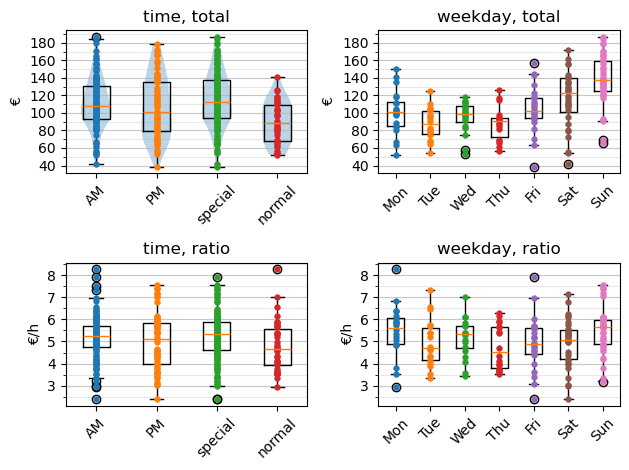

render plots done.
sending data
sent data


In [19]:
statistic()